## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1  ...         Y
0 -0.419782  ...  0.159686
1 -0.417339  ... -0.101524
2 -0.417342  ...  1.324247
3 -0.416750  ...  1.182758
4 -0.412482  ...  1.487503

[5 rows x 14 columns]


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 47.9ms	remaining: 47.9s
1:	learn: 0.9582303	total: 49ms	remaining: 24.5s
2:	learn: 0.9353695	total: 49.8ms	remaining: 16.6s
3:	learn: 0.9161608	total: 50.7ms	remaining: 12.6s
4:	learn: 0.8990488	total: 51.4ms	remaining: 10.2s
5:	learn: 0.8832373	total: 52.3ms	remaining: 8.66s
6:	learn: 0.8650817	total: 53.1ms	remaining: 7.54s
7:	learn: 0.8477194	total: 54ms	remaining: 6.7s
8:	learn: 0.8311338	total: 54.9ms	remaining: 6.04s
9:	learn: 0.8132347	total: 55.7ms	remaining: 5.51s
10:	learn: 0.7953546	total: 56.5ms	remaining: 5.08s
11:	learn: 0.7796915	total: 57.3ms	remaining: 4.72s
12:	learn: 0.7641617	total: 58.1ms	remaining: 4.41s
13:	learn: 0.7484061	total: 58.9ms	remaining: 4.15s
14:	learn: 0.7353909	total: 59.7ms	remaining: 3.92s
15:	learn: 0.7199546	total: 60.5ms	remaining: 3.72s
16:	learn: 0.7058790	total: 61.5ms	remaining: 3.55s
17:	learn: 0.6928959	total: 62.2ms	remaining: 3.39s
18:	learn: 0.6802797	total: 63ms	remaining: 3.25s
19:	learn: 0.6666222	total: 6

164:	learn: 0.2372001	total: 185ms	remaining: 938ms
165:	learn: 0.2366878	total: 187ms	remaining: 937ms
166:	learn: 0.2363036	total: 187ms	remaining: 935ms
167:	learn: 0.2355500	total: 188ms	remaining: 933ms
168:	learn: 0.2349215	total: 189ms	remaining: 930ms
169:	learn: 0.2341849	total: 190ms	remaining: 928ms
170:	learn: 0.2335247	total: 191ms	remaining: 925ms
171:	learn: 0.2330065	total: 192ms	remaining: 923ms
172:	learn: 0.2326195	total: 193ms	remaining: 920ms
173:	learn: 0.2319223	total: 193ms	remaining: 918ms
174:	learn: 0.2313989	total: 194ms	remaining: 915ms
175:	learn: 0.2306230	total: 195ms	remaining: 912ms
176:	learn: 0.2299509	total: 196ms	remaining: 910ms
177:	learn: 0.2293964	total: 196ms	remaining: 907ms
178:	learn: 0.2288240	total: 197ms	remaining: 905ms
179:	learn: 0.2283193	total: 198ms	remaining: 903ms
180:	learn: 0.2276200	total: 199ms	remaining: 901ms
181:	learn: 0.2270094	total: 200ms	remaining: 898ms
182:	learn: 0.2265258	total: 201ms	remaining: 896ms
183:	learn: 

326:	learn: 0.1642024	total: 324ms	remaining: 667ms
327:	learn: 0.1638373	total: 327ms	remaining: 669ms
328:	learn: 0.1635890	total: 328ms	remaining: 668ms
329:	learn: 0.1632923	total: 329ms	remaining: 667ms
330:	learn: 0.1629712	total: 329ms	remaining: 666ms
331:	learn: 0.1624494	total: 330ms	remaining: 664ms
332:	learn: 0.1620981	total: 331ms	remaining: 663ms
333:	learn: 0.1618328	total: 332ms	remaining: 662ms
334:	learn: 0.1614792	total: 333ms	remaining: 660ms
335:	learn: 0.1611670	total: 333ms	remaining: 659ms
336:	learn: 0.1607130	total: 334ms	remaining: 658ms
337:	learn: 0.1604204	total: 335ms	remaining: 656ms
338:	learn: 0.1601258	total: 336ms	remaining: 655ms
339:	learn: 0.1598547	total: 337ms	remaining: 654ms
340:	learn: 0.1595338	total: 338ms	remaining: 653ms
341:	learn: 0.1591560	total: 339ms	remaining: 651ms
342:	learn: 0.1588241	total: 339ms	remaining: 650ms
343:	learn: 0.1584322	total: 340ms	remaining: 649ms
344:	learn: 0.1581554	total: 341ms	remaining: 647ms
345:	learn: 

487:	learn: 0.1253223	total: 464ms	remaining: 486ms
488:	learn: 0.1251908	total: 465ms	remaining: 486ms
489:	learn: 0.1251006	total: 466ms	remaining: 485ms
490:	learn: 0.1250088	total: 466ms	remaining: 483ms
491:	learn: 0.1247732	total: 467ms	remaining: 482ms
492:	learn: 0.1245630	total: 468ms	remaining: 481ms
493:	learn: 0.1243378	total: 469ms	remaining: 480ms
494:	learn: 0.1240792	total: 470ms	remaining: 479ms
495:	learn: 0.1238442	total: 470ms	remaining: 478ms
496:	learn: 0.1235879	total: 472ms	remaining: 477ms
497:	learn: 0.1234208	total: 472ms	remaining: 476ms
498:	learn: 0.1231217	total: 473ms	remaining: 475ms
499:	learn: 0.1229870	total: 474ms	remaining: 474ms
500:	learn: 0.1227567	total: 475ms	remaining: 473ms
501:	learn: 0.1226643	total: 476ms	remaining: 472ms
502:	learn: 0.1224801	total: 477ms	remaining: 471ms
503:	learn: 0.1223190	total: 478ms	remaining: 470ms
504:	learn: 0.1221077	total: 478ms	remaining: 469ms
505:	learn: 0.1219576	total: 479ms	remaining: 468ms
506:	learn: 

648:	learn: 0.0992698	total: 601ms	remaining: 325ms
649:	learn: 0.0991658	total: 602ms	remaining: 324ms
650:	learn: 0.0990463	total: 603ms	remaining: 323ms
651:	learn: 0.0989367	total: 604ms	remaining: 322ms
652:	learn: 0.0988354	total: 605ms	remaining: 321ms
653:	learn: 0.0986840	total: 605ms	remaining: 320ms
654:	learn: 0.0985309	total: 606ms	remaining: 319ms
655:	learn: 0.0984249	total: 607ms	remaining: 318ms
656:	learn: 0.0982410	total: 608ms	remaining: 317ms
657:	learn: 0.0980422	total: 609ms	remaining: 316ms
658:	learn: 0.0979537	total: 610ms	remaining: 315ms
659:	learn: 0.0978566	total: 610ms	remaining: 314ms
660:	learn: 0.0977789	total: 611ms	remaining: 313ms
661:	learn: 0.0975704	total: 612ms	remaining: 312ms
662:	learn: 0.0973971	total: 613ms	remaining: 311ms
663:	learn: 0.0972629	total: 614ms	remaining: 311ms
664:	learn: 0.0971872	total: 615ms	remaining: 310ms
665:	learn: 0.0969158	total: 615ms	remaining: 309ms
666:	learn: 0.0967571	total: 616ms	remaining: 308ms
667:	learn: 

809:	learn: 0.0799547	total: 738ms	remaining: 173ms
810:	learn: 0.0798502	total: 739ms	remaining: 172ms
811:	learn: 0.0798206	total: 740ms	remaining: 171ms
812:	learn: 0.0797762	total: 740ms	remaining: 170ms
813:	learn: 0.0795790	total: 741ms	remaining: 169ms
814:	learn: 0.0794840	total: 742ms	remaining: 168ms
815:	learn: 0.0793834	total: 743ms	remaining: 168ms
816:	learn: 0.0793158	total: 744ms	remaining: 167ms
817:	learn: 0.0792219	total: 745ms	remaining: 166ms
818:	learn: 0.0790540	total: 745ms	remaining: 165ms
819:	learn: 0.0789521	total: 746ms	remaining: 164ms
820:	learn: 0.0788686	total: 747ms	remaining: 163ms
821:	learn: 0.0786589	total: 748ms	remaining: 162ms
822:	learn: 0.0785698	total: 749ms	remaining: 161ms
823:	learn: 0.0784177	total: 750ms	remaining: 160ms
824:	learn: 0.0782497	total: 751ms	remaining: 159ms
825:	learn: 0.0781281	total: 752ms	remaining: 158ms
826:	learn: 0.0780508	total: 752ms	remaining: 157ms
827:	learn: 0.0779554	total: 753ms	remaining: 156ms
828:	learn: 

969:	learn: 0.0652869	total: 872ms	remaining: 27ms
970:	learn: 0.0652557	total: 873ms	remaining: 26.1ms
971:	learn: 0.0652081	total: 874ms	remaining: 25.2ms
972:	learn: 0.0651396	total: 875ms	remaining: 24.3ms
973:	learn: 0.0651023	total: 875ms	remaining: 23.4ms
974:	learn: 0.0650096	total: 876ms	remaining: 22.5ms
975:	learn: 0.0649243	total: 877ms	remaining: 21.6ms
976:	learn: 0.0647928	total: 878ms	remaining: 20.7ms
977:	learn: 0.0647539	total: 879ms	remaining: 19.8ms
978:	learn: 0.0646302	total: 880ms	remaining: 18.9ms
979:	learn: 0.0645675	total: 881ms	remaining: 18ms
980:	learn: 0.0644549	total: 881ms	remaining: 17.1ms
981:	learn: 0.0643118	total: 882ms	remaining: 16.2ms
982:	learn: 0.0642510	total: 883ms	remaining: 15.3ms
983:	learn: 0.0641533	total: 884ms	remaining: 14.4ms
984:	learn: 0.0641384	total: 885ms	remaining: 13.5ms
985:	learn: 0.0640055	total: 886ms	remaining: 12.6ms
986:	learn: 0.0639470	total: 887ms	remaining: 11.7ms
987:	learn: 0.0638750	total: 887ms	remaining: 10.8

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

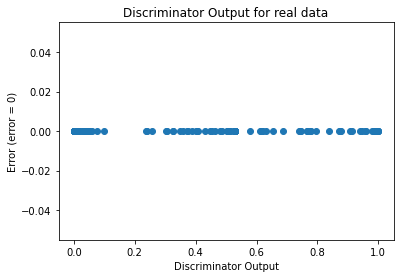

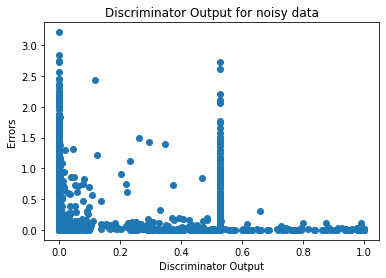

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

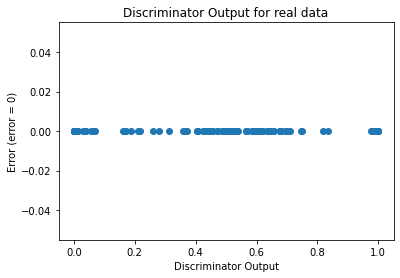

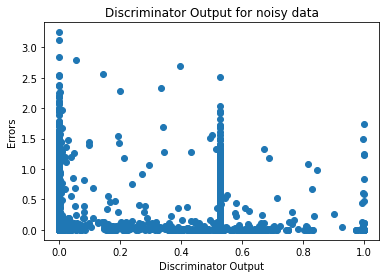

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9703]], device='cuda:0', requires_grad=True)
